<hr/>

# Data Mining

10/17/2019

**Hanyao(Amy) Qiu** - hqiu11@jhu.edu <br/>
**Office Hour** - F 10:30am ~ 11:30am $~$ Whitehead 212 (Whitehead Hall Second Level Common Area) <br/>
**Section**$~~~~~~$ - Th 4:30pm ~ 5:20pm $~~~$ Shaffer 302
<br>

## Section 7 

- **Naive Bayes Classifier** 
- **QDA & LDA**
- **Cross Validation**
-  Q & A
<hr/>

In [ ]:
%pylab inline

<h1>Naive Bayes Classifier</font></h1>

- In general, we can use Bayes' rule (and law of total probability) to infer discrete classes $C_k$ for a given $\boldsymbol{x}$ set of features

>$\displaystyle P(C_k \lvert\,\boldsymbol{x}) = \frac{\pi(C_k)\,{\cal{}L}_{\boldsymbol{x}}(C_k)}{Z} $ 


- Naively assuming the features are independent 

>$\displaystyle {\cal{}L}_{\boldsymbol{x}}(C_k) = \prod_{\alpha}^d p(x_{\alpha} \lvert C_k)$ 


### Naive Bayes: Learning

- Say for Gaussian likelihoods, we simply estimate the sample mean and variance of all features for each class $k$

>$\displaystyle p(x_{\alpha} \lvert C_k) = G(x_{\alpha};\mu_{k,\alpha}, \sigma^2_{k,\alpha})$

- We have to also pick some prior for the classes

> Using uniform or based on frequency of points in the training set?



### blackboard Explanation

[Naive Bayes](https://www.youtube.com/watch?v=8yvBqhm92xA)

### Exercise: Gaussian Naive Bayes

- Use the provided [training](Class-Train.csv) and [query](Class-Query.csv) sets to perform classification

> **Training** set consists of 3 columns of ($x_i$, $y_i$, $C_i$)

> **Query** set only has 2 columns of ($x_i$, $y_i$)


In [ ]:
D = np.loadtxt('Class-Train.csv', delimiter=',')
Q = np.loadtxt('Class-Query.csv', delimiter=',')
print(D.shape)
print(Q.shape)
X, C = D[:,0:2], D[:,2]
print(Q[:,0].size)

In [ ]:
classes = np.unique(C)
print ('There are %d classes:' % len(classes), classes)

In [ ]:
# calculate feature means and variances for each class
param = dict()  # we save them in this dictionary
for k in classes: ## 0,1,2
    members = (C == k) # boolean array
    num = members.sum()    # True:1, False:0
    prior = num / float(C.size)
    X = D[members,:2] # slice out members
    #print(X)
    mu = np.mean(X,axis=0)      # calc mean
    X -= mu
    var = (X*X).sum(axis=0) / (X[:,0].size-1)
    param[k] = (num, prior, mu, var) # save results
    #print(param)
    print (k,mu,var) 
    

In [ ]:
# init predicted values
k_pred = -1 * ones(Q[:,0].size)

# evaluate posterior for each point and find maximum
for i in range(Q[:,0].size):
    pmax, kmax = -1, None   # initialize to nonsense values
    for k in classes:
        num, prior, mu, var = param[k]
        diff = Q[i,:] - mu
        d2 = diff*diff / (2*var) 
        p = prior * np.exp(-d2.sum()) / np.sqrt(np.prod(2*pi*var))
        if p > pmax:
            pmax = p
            kmax = k
    k_pred[i] = kmax

In [ ]:
from sklearn.naive_bayes import GaussianNB
X, C = D[:,0:2], D[:,2]
gnb = GaussianNB()
y_pred = gnb.fit(X, C).predict(Q)

In [ ]:
# same results from both methods?
np.alltrue(k_pred[:1000]==y_pred[:1000])

### Unhomework

- Visualize the results in the 2D features space
- Make these simple codes run faster by getting rid of the `for` loops, etc.


In [1]:
from sklearn import datasets

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load the data
iris = datasets.load_iris() 
classes = np.unique(iris.target) 
print ('There are %d classes:' % len(classes), classes)

There are 3 classes: [0 1 2]


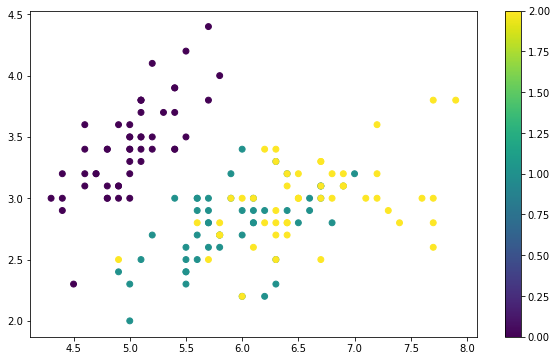

In [3]:
# data visualization 
plt.figure(figsize=(10, 6)) 
plt.scatter(iris.data[:,0], iris.data[:,1], c = iris.target, marker = 'o', s = 35) # plot data with true labels
plt.colorbar() # 0: blue, 1: green, 2: red 

[Parameters](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

In [ ]:
import datetime
starttime = datetime.datetime.now()
# calculate feature means and variances for each class
param = dict()  # save them in this dictionary
for k in classes:
    members = (iris.target == k) # boolean array
    num = members.sum()    # True:1, False:0
    prior = num / float(iris.target.size)
    X = iris.data[members,:] # slice out members
    mu = X.mean(axis=0)      # calculate the mean
    X -= mu # normalize
    var = (X*X).sum(axis=0) / (X[:,0].size-1) # sample variance
    param[k] = (num, prior, mu, var) # save results: number of data, prior, mean, variance
    if True: print (k, mu, var)
        

# init predicted values
k_pred = -1 * ones(iris.target.size)

# evaluate posterior for each point and find maximum
for i in range(iris.target.size):
    pmax, kmax = -1, None   # initialize to nonsense values
    for k in classes:
        num, prior, mu, var = param[k]
        diff = iris.data[i,:] - mu 
        d2 = diff*diff / (2*var) 
        p = prior * np.exp(-d2.sum()) / np.sqrt(np.prod(2*pi*var)) # posterior = prior * likelihood
        if p > pmax:
            pmax = p 
            kmax = k
    k_pred[i] = kmax # predicted labels: index of the maximum a posterior

print("Number of mislabeled points out of a total %d points : %d"
      % (iris.target.size, (iris.target!=k_pred).sum())) # number of mislabeled points
        
       
endtime = datetime.datetime.now()
print ("time running is")
print ((endtime - starttime))   


In [ ]:
# compare the predictions with original labels
plt.figure(figsize=(20, 5))
subplot(1,2,1)
plt.scatter(iris.data[:,0], iris.data[:,1], c = iris.target, marker = 'x', s = 35) # plot data with true labels
plt.colorbar()
subplot(1,2,2)
plt.scatter(iris.data[:,0], iris.data[:,1], c = k_pred, marker = 'o', s = 35) # plot data with predicted labels
plt.colorbar()

In [8]:
# run sklearn's version 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() # Gaussian Naive Bayes Classifier
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data) # predicted labels

print("Number of mislabeled points out of a total %d points : %d"
      % (iris.target.size, (iris.target!=y_pred).sum())) # number of mislabeled points

Number of mislabeled points out of a total 150 points : 6


#### Could you make codes run faster by getting rid of the `for` loops, etc.

## Pros and Cons

- Features are automatically treated correctly relative to each other

> For example, measuring similar things in different units? 1m vs 1mm
><br><br>
> The estimated mean and variance puts them on a meaningful scale

- Independence is a strong assumption and for no good reason

> Actually... it helps with the computational cost!


#### When to use  Naive Bayes 

> Naive Bayes performs well when we have multiple classes and working with text classification.

> When dealing with text, it’s very common to treat each unique word as a feature, and since the typical person’s vocabulary is many thousands of words, this makes for a large number of features. The relative simplicity of the algorithm and the independent features assumption of Naive Bayes make it a strong performer for classifying texts.



##### They have several advantages:

> 1. They are extremely fast for both training and prediction

> 2. They provide straightforward probabilistic prediction

> 3. They are often very easily interpretable


> These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification. 
> If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. 
> If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

##### Naive Bayes classifiers tend to perform especially well in one of the following situations:

> 1. When the naive assumptions actually match the data (very rare in practice)

> 2. For very well-separated categories, when model complexity is less important

> 3. For very high-dimensional data, when model complexity is less important

> The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall). This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: ***once you have enough data, even a simple model can be very powerful.***

<h1>QDA & LDA</font></h1>

### Full Covariance Matrix

- Estimate the full covariance matrix for the classes

>$\displaystyle {\cal{}L}_{\boldsymbol{x}}(C_k) =  G(\boldsymbol{x};\mu_k, \Sigma_k)$

> Handles correlated features well

- Consider binary problem with 2 classes

> Taking the negative logarithm of the likelihoods we compare

>$\displaystyle (\boldsymbol{x}\!-\!\boldsymbol{\mu}_1)^T\,\Sigma_1^{-1}(\boldsymbol{x}\!-\!\boldsymbol{\mu}_1) + \ln\,\lvert\Sigma_1\lvert$ vs.

>$\displaystyle (\boldsymbol{x}\!-\!\boldsymbol{\mu}_2)^T\,\Sigma_2^{-1}(\boldsymbol{x}\!-\!\boldsymbol{\mu}_2) + \ln\,\lvert\Sigma_2\lvert$

> If the difference is lower than a threshold, we classify it accordingly

- This is called [**Quadratic Discriminant Analysis**](https://scikit-learn.org/stable/modules/lda_qda.html)

### Same Covariance Matrix

- When $\Sigma_1=\Sigma_2=\Sigma$, the quadratic terms cancel from the difference
 
>$\displaystyle (x\!-\!\mu_1)^T\,\Sigma^{-1}(x\!-\!\mu_1) $ 
>$\displaystyle -\ (x\!-\!\mu_2)^T\,\Sigma^{-1}(x\!-\!\mu_2) $

- Hence this is called **Linear Discriminant Analysis**

> Fewer parameters to estimate during the learning process
><br><br>
> Good, if we don't have enough data, for example...
><br><br>
> Think linear vs quadratic fitting and how you decide between those

#### How to choose between LDA and QDA?

> The difference is really a **bias-variance trade-off**. 

> The QDA estimates a separate covariance matrix for each class, so as the number of predictors becomes high, we experience a computational expense. Conversely, if we assume a common covariance matrix, we only have to do the computation once. LDA is a less flexible classifier than QDA, thus has substantially lower variance. However, if the assumption of uniform variance is highly off, then LDA can suffer high bias.     

#### Relation with Gaussian Naive Bayes
If in the LDA/QDA model one assumes that the covariance matrices are diagonal, then the inputs are assumed to be conditionally independent in each class, and the resulting classifier is equivalent to the Gaussian Naive Bayes classifier.

### Exercise: QDA and LDA

- Use the provided [training](Class-Train.csv) and [query](Class-Query.csv) sets to perform classification

> **Training** set consists of 3 columns of ($x_i$, $y_i$, $C_i$)
><br><br>
> **Query** set only has 2 columns of ($x_i$, $y_i$)



In [5]:
class MyQDA(object):    
    def fit(self,X,C):
        self.param = dict()
        for k in np.unique(C):
            members = (C==k)
            prior = members.sum() / float(C.size)
            S = X[members,:] # subset of class 
            mu = S.mean(axis=0)    
            Z = (S-mu).T # centered column vectors
            cov = Z.dot(Z.T) / (Z[0,:].size-1)
            self.param[k] = (mu,cov,prior)
        return self
            
    def predict(self,Y):
        Cpred = -1 * ones(Y[:,0].size)
        for i in range(Cpred.size):
            d2min, kbest = 1e99, None
            for k in self.param:
                mu, cov, prior = self.param[k]
                diff = (Y[i,:]-mu).T
                d2 = diff.T.dot(linalg.inv(cov)).dot(diff) / 2
                d2 += np.log(linalg.det(cov)) / 2 - np.log(prior) 
                if d2<d2min: d2min,kbest = d2,k
            Cpred[i] = kbest
        return Cpred

In [7]:
# reference implementation
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

D = np.loadtxt('Class-Train.csv', delimiter=',')
Q = np.loadtxt('Class-Query.csv', delimiter=',')
print(D.shape)
print(Q.shape)
X, C = D[:,0:2], D[:,2]

Cpred = MyQDA().fit(X,C).predict(Q)
Cskit =   QDA().fit(X,C).predict(Q)

print ('Number of different estimates:', (Cpred!=Cskit).sum())

(313, 3)
(9207, 2)
Number of different estimates: 0


### LDA 

In [ ]:
class MyLDA(object):
    """ Simple implementation for illustration purposes
    """       
    def fit(self,X,C):
        self.param = dict()
        for k in np.unique(C):
            members = (C==k)
            num = members.sum()
            prior = members.sum() / float(C.size)
            S = X[members,:] # subset of class 
            mu = S.mean(axis=0)    
            Z = (S-mu).T # centered column vectors
            cov = Z.dot(Z.T) / (Z[0,:].size-1)
            self.param[k] = (mu,cov,prior,num)
        return self
            
    def predict(self,Y):
        Cpred = -1 * ones(Y[:,0].size)
        cov = 0
        total = 0
        for k in self.param:
            cov += self.param[k][1]*(self.param[k][3]-1)
            total += self.param[k][3]-1
        cov /= total
        for i in range(Cpred.size):
            d2min, kbest = 1e99, None
            for k in self.param:
                mu, _, prior,_ = self.param[k]
                diff = (Y[i,:]-mu).T
                d2 = diff.T.dot(linalg.inv(cov)).dot(diff) / 2
                d2 -=  np.log(prior) 
                if d2<d2min: d2min,kbest = d2,k
            Cpred[i] = kbest
        return Cpred

In [ ]:
# reference implementation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
D = np.loadtxt('Class-Train.csv', delimiter=',')
Q = np.loadtxt('Class-Query.csv', delimiter=',')

X, C = D[:,:2], D[:,2]

print(D.shape)
print(Q.shape)
Cpred = MyLDA().fit(X,C).predict(Q)
Cskit =   LDA().fit(X,C).predict(Q)

print ('Number of different estimates:', (Cpred!=Cskit).sum())

<h1>Cross-Validation</font></h1>

- How to ***evaluate the quality of estimator***?

> $k$-NN method's parameter affects the results

- We saw on the IRIS data that 1-NN was overfitting

> We discussed excluding the point itself

### How to do?
- Partitions of the Training set

- Random complementary subsets 

> Train on a larger subset, test on a small
> <br>
> Multiple rounds to decrease variance`

#### $k$-fold cross-validation 

> 1. Create $k$ partitions of equal sizes, e.g., $k=2$ yields two subsets
> 2. Pick a single partition and train on the other $(k\!-\!1)$ 
> 3. Repeat for all $k$ partitions - requires $k$ trainings

- Leave-One-Out is a special case with $k=n$


### Exercise: Cross-Validation

- Evaluate QDA on the [training](files/Class-Train.csv) set using 2-fold cross-validation

> 1. What is the fraction of correct estimates? 
> 2. What is the uncertainty of that fraction?
 
> The **training** set consists of 3 columns of ($x_i$, $y_i$, $C_i$)


In [ ]:
D = np.loadtxt('Class-Train.csv', delimiter=',')
Q = np.loadtxt('Class-Query.csv', delimiter=',')

In [ ]:
for i,j in enumerate([2,3]):
    print(i,j)

In [ ]:
Dc = D.copy()
# randomize and split to D1 + D2
np.random.seed(seed=42)
np.random.shuffle(Dc)
split = int(Dc[:,0].size/2)
D1, D2 = Dc[:split,:], Dc[split:,:]
# train on one estimate on the other
for i,(T,Q) in enumerate([(D1,D2),(D2,D1)]):
    X, C = T[:,0:2], T[:,2]
    Cpred, Ctrue = MyQDA().fit(X,C).predict(Q[:,:2]), Q[:,2]
    print ("Case #%d - Number of mislabeled points out of a total %3d points : %2d" \
        % (i, Q.shape[0],(Ctrue!=Cpred).sum()))

### 3-fold CV - quick hack

In [ ]:
Dc = D.copy()

# randomize and split to D1 + D2
np.random.seed(seed=42)
np.random.shuffle(Dc)
split = int(Dc[:,0].size/3)
split2 = 2*split
D1, D2, D3 = Dc[:split,:], Dc[split:split2,:], Dc[split2:]

# train on one, estimate on the other
for T,Q in [ (np.vstack([D1,D2]),D3), (np.vstack([D2,D3]),D1), (np.vstack([D3,D1]),D2)]:
    Cpred = QDA().fit(T[:,:2],T[:,2]).predict(Q[:,:2])
    Ctrue = Q[:,2]
    print ((Cpred!=Ctrue).sum(), T.shape)

### Unhomework

- Implement LDA and compare to sklearn

>0. Write code without using sklearn 
>0. Apply to [training](Class-Train.csv) and [query](Class-Query.csv) sets 
>0. Compare your results to sklearn's 

- Perform 10-fold cross-validation of *MyQDA* on [this](Class-Train.csv) file

>0. Write code without using sklearn 
>0. Calculate average and variance of good classifications 
>0. Compare to sklearn 

In [ ]:
D = np.loadtxt('Class-Train.csv', delimiter=',')
X = D[:,:2]
C = D[:,2]

In [ ]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=False) 

for k, (train, test) in enumerate(k_fold.split(X)):
    print(k,np.shape(train),np.shape(test))
    Cpred = MyQDA().fit(X[train],C[train]).predict(X[test])
    print (k, ':\t', (C[test]==Cpred).sum() / float(test.size))

In [ ]:
# k-fold CV using sklearn package
from sklearn.model_selection import cross_val_score
clf = QDA()
cross_val_score(clf, X,C, cv=10)

### Exercise / Unhomework from section 6

- Which two features work best to predict the classes of the iris dataset?
- How much better/worse than using all features

In [ ]:
import datetime as dt
from sklearn import neighbors

k_fold = KFold(n_splits=10, shuffle=False) 

for k in [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],[0,1,2,3]]:
    print('For features:')
    print(k) 
    X = iris.data[:,k] # using only 2 features for each
    y = iris.target
    clf = neighbors.KNeighborsClassifier(5)
    score = []
    for p, (train, test) in enumerate(k_fold.split(X)):
        Cpred = clf.fit(X[train],y[train]).predict(X[test])
        temp = (y[test]==Cpred).sum() / float(test.size)
        score.append(temp)
        
        #print(p, ':\t', temp )
    #print(score)
    
    crossv_score = sum(score)/10
    
    print("Cross validation score is : %f"
          % (crossv_score))
    print("sklearn cross validation score is: %f"
         % (mean(cross_val_score(clf, X,y, cv=10))))
    print("======================================")